# Pymaceuticals Inc.

### Analysis:
**Satistical Analysis on Drug Regmines** : Capomulin and Ramicane demonstrate lower average tumor volumes, suggesting their potential effectiveness in reducing tumor sizes, with mean tumor volumes of approximately 40.68 mm³ and 40.22 mm³, respectively. In contrast, Ketapril, Naftisol, and Placebo exhibit higher variances and standard deviations, indicating greater variability in tumor volume measurements and implying less treatment efficacy consistency. Specifically, Ketapril has a variance of approximately 68.55 and a standard deviation of 8.28, Naftisol has a variance of about 66.17 and a standard deviation of 8.13, and Placebo has a variance of around 61.17 and a standard deviation of 7.82. Furthermore, the low SEM values across all regimens signify relatively precise estimates of the population mean for tumor volume, reinforcing the reliability of the dataset and the quality of the measurements. These insights emphasize the potential effectiveness of Capomulin and Ramicane in tumor size reduction, while highlighting the variability and treatment inconsistency in Ketapril, Naftisol, and Placebo regimens.

**Distribution of tumor volume for different treatment group:** In the analysis of the distribution of tumor volume for different treatment group, it appears that there are potential outliers in the dataset for the Infubinol treatment group. Specifically, one data point with a tumor volume of approximately 36.32 mm³ is identified as a potential outlier. This suggests that this particular data point deviates significantly from the typical values within the Infubinol group,which might warrant further investigation.

**Time vs. Tumor Size:** The tumor size for the mouse "l509",which was treated with the drug Capomulin, increases initially from day 0 to day 20, reaching a peak at day 20 (48.07 mm^3). Afterward, the tumor size decreases, reaching 41.48 mm^3 at day 45.

**Weight (g)" vs. Tumor Volume (mm3):** For mice with weights above 20 grams, the average tumor volume was found to be approximately 43.08 mm³, whereas for mice with weights below 20 grams, the average tumor volume was approximately 38.28 mm³. This suggests a slight tendency for mice with higher weights to exhibit higher average tumor volumes. Notably, the high correlation coefficient of 0.84 between mouse weight and the average tumor volume further supports this observation, indicating a strong positive relationship between weight and tumor volume in this dataset


**Drug Regimen vs Number of Observed Mouse Timepoint:** The bar represent the counts of observed mice for different drug regimens in the dataset. Specifically, Capomulin has 230 observed mice, Ramicane has 228 observed mice, and Propriva has 148 observed mice. This information provides a clear overview of the distribution of mice among these drug regimens. Capomulin and Ramicane have the highest numbers of observed mice, suggesting larger sample sizes for these treatment groups, while Propriva has a lower count of observed mice.

**Conclusion**

**Efficacy of Capomulin and Ramicane:** The statistical analysis indicates that the drug regimens Capomulin and Ramicane demonstrate lower average tumor volumes and lower variability, suggesting their potential effectiveness in reducing tumor sizes and providing more consistent treatment results. These regimens have shown promise in terms of tumor size reduction and are good candidates for further investigation or as preferred treatments for managing tumor growth.

**Outliers in the Infubinol Treatment Group:** The analysis of the distribution of tumor volume for different treatment groups reveals a potential outlier in the Infubinol treatment group. One data point with a tumor volume of approximately 36.32 mm³ deviates significantly from the typical values within this group. This outlier warrants further investigation to understand its origin and assess its impact on the effectiveness of the Infubinol regimen. Outliers can sometimes skew results and need to be carefully examined.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
#study_results
# Combine the data into a single DataFrame
pymaceuticals_df=pd.merge(study_results, mouse_metadata,how="left",on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [35]:
# Checking the number of mice.
mice_count=pymaceuticals_df["Mouse ID"].nunique()
mice_count

249

In [36]:
#uniquely identifies by Mouse ID and Timepoint and Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pymaceuticals_df[pymaceuticals_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [37]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_df=pymaceuticals_df[pymaceuticals_df["Mouse ID"]=="g989"]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
#clean DataFrame by dropping the duplicate mouse by its ID.
noduplicatemice_df=pymaceuticals_df[pymaceuticals_df["Mouse ID"]!="g989"]
noduplicatemice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice in the clean DataFrame.
noduplicate_mice_count=noduplicatemice_df["Mouse ID"].nunique()
noduplicate_mice_count

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
tumor_volume_mean=noduplicatemice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median=noduplicatemice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_var=noduplicatemice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std=noduplicatemice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem=noduplicatemice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mice_summary=pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,
                         "Median Tumor Volume":tumor_volume_median,
                         "Tumor Volume Variance":tumor_volume_var,
                         "Tumor Volume Std. Dev.":tumor_volume_std,
                         "Tumor Volume Std. Err.":tumor_volume_sem})
mice_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_summary_stats=noduplicatemice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean="mean", median="median", var="var",std="std",Sem="sem")
mice_summary_stats    

,mean,median,var,std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

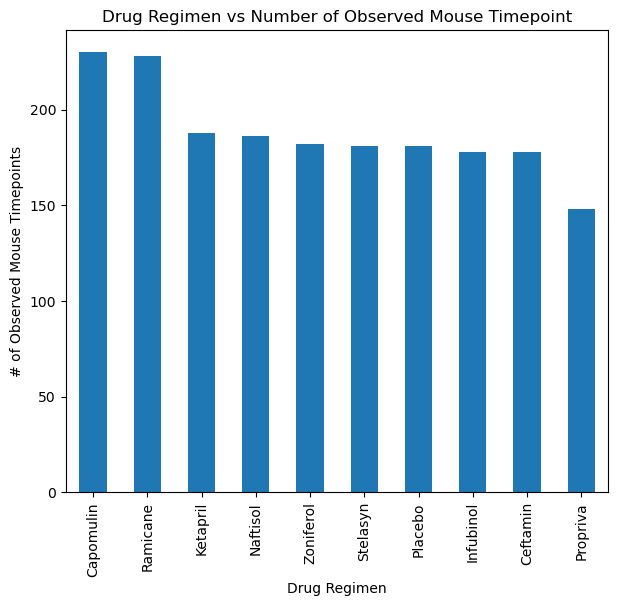

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data =noduplicatemice_df.groupby('Drug Regimen')['Mouse ID'].count().sort_index(ascending=False).sort_values(ascending=False)
grouped_data.plot(kind="bar",xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints',
                  title="Drug Regimen vs Number of Observed Mouse Timepoint",figsize=(7, 6))
plt.show()

[]

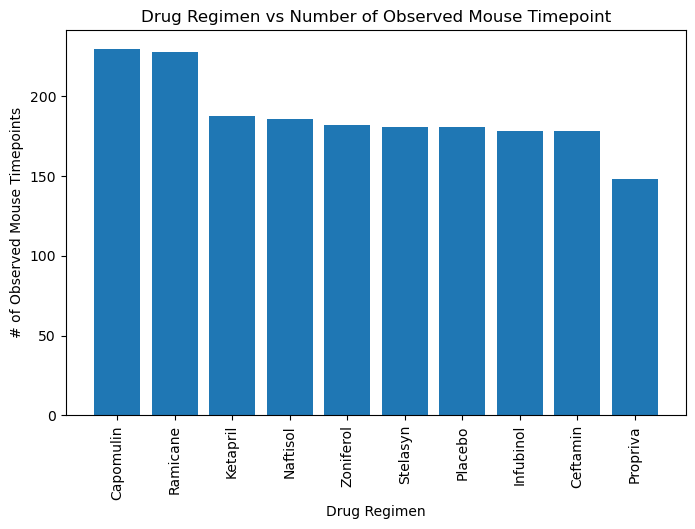

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_data =noduplicatemice_df.groupby('Drug Regimen')['Mouse ID'].count().sort_index(ascending=False).sort_values(ascending=False)
regimens = grouped_data.index
counts = grouped_data.values
plt.figure(figsize=(8, 5)) 
plt.bar(regimens, counts)
plt.title("Drug Regimen vs Number of Observed Mouse Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.plot()

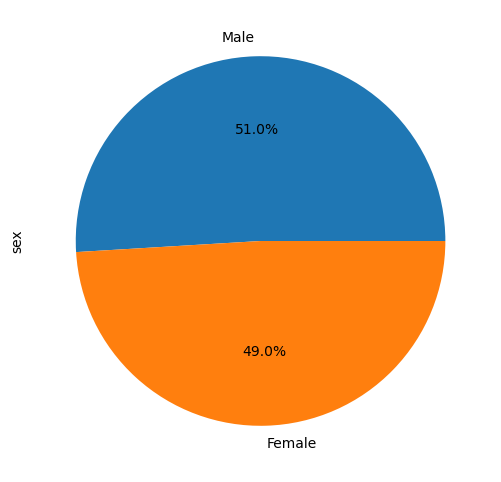

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_data =noduplicatemice_df['Sex'].value_counts()
grouped_data.plot(kind="pie",ylabel="sex",figsize=(7,6), autopct='%4.1f%%')
plt.show()

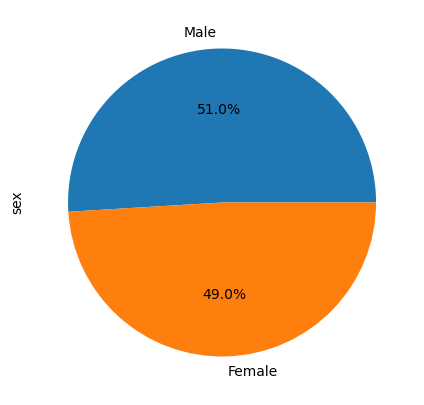

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_data = noduplicatemice_df['Sex'].value_counts()
plt.figure(figsize=(5, 5))
sex_value=grouped_data.values
labels=grouped_data.index
plt.pie(sex_value,labels=labels, autopct='%1.1f%%')
plt.ylabel("sex") 
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Step 1: Get the last timepoint for each mouse,retrieve the maximum timepoint for each mouse and reset the index of df.
last_timepoint_df = noduplicatemice_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge with the original DataFrame to get the final tumor volume
final_tumor_volume_df = pd.merge(noduplicatemice_df, last_timepoint_df,how="right", on=["Mouse ID","Timepoint"])
final_tumor_volume_df 

# Filter for the specified treatment regimens
picked_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(picked_regimens)]

In [47]:
# Define the four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin.
drug_regimen_order = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Put treatments into a list for for loop (and later for plot labels)
for regimen in drug_regimen_order:
    tumor_volume_data.append(final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'])

# Determine outliers using upper and lower bounds
grouped_data = final_tumor_volume_df.groupby('Drug Regimen')

# Define a function to identify potential outliers for each group and calculate IQR
def find_potential_outliers_and_iqr(group):
    # Calculate the IQR (Interquartile Range) for the 'Tumor Volume (mm3)' column
    quartiles = group['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Define the lower and upper bounds to identify potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Find potential outliers
    outliers = group[(group['Tumor Volume (mm3)'] < lower_bound) | (group['Tumor Volume (mm3)'] > upper_bound)]
    
    return iqr, outliers

# Create an empty list to store IQR values
iqr_values = []
# Iterate through each group to display the interquartile range (IQR) and the outliers for each treatment group.
for group_name, group_data in grouped_data:
    iqr, outliers = find_potential_outliers_and_iqr(group_data)
    print(f"{group_name}'s potential outliers:{outliers['Tumor Volume (mm3)']}")
    iqr_values.append(iqr)
# Print the IQR values
print("\nIQR values for all treatment groups:")
for i, regimen in enumerate(drug_regimen_order):
    print(f"{regimen}: {iqr_values[i]}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

IQR values for all treatment groups:
Capomulin: 7.781863460000004
Ramicane: 15.577752179999997
Infubinol: 11.477135160000003
Ceftamin: 9.098536719999998


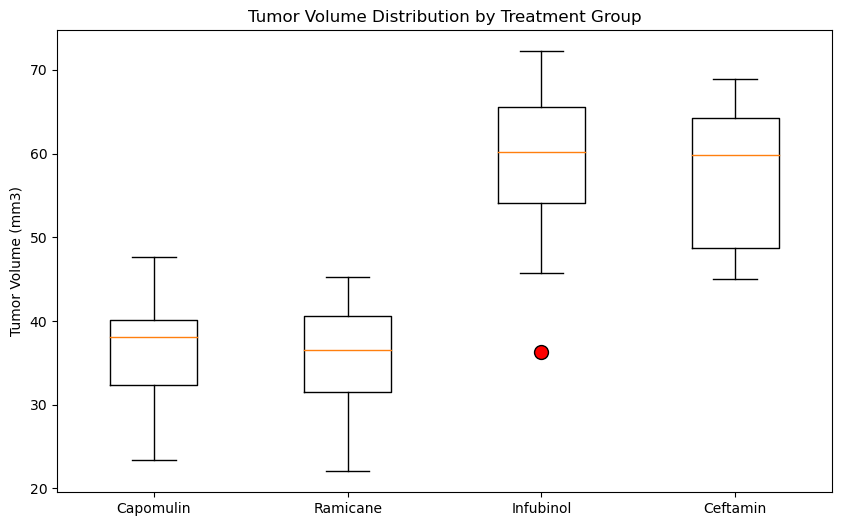

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=drug_regimen_order,flierprops=dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none'))
plt.title('Tumor Volume Distribution by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

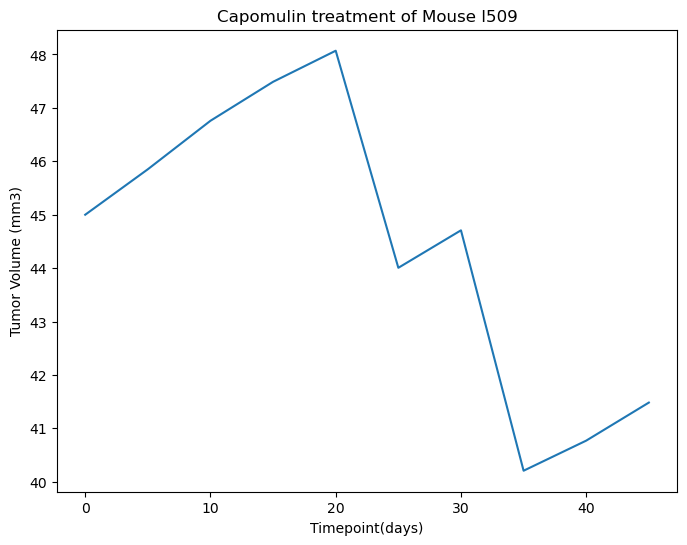

In [49]:
# create the data frame time point for a single mouse treated with Capomulin
capomulin_mouse_data =noduplicatemice_df[(noduplicatemice_df['Drug Regimen'] == 'Capomulin') & 
                                              (noduplicatemice_df['Mouse ID'] == "l509")]
# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'])

# Customize the plot
plt.title(f'Capomulin treatment of Mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

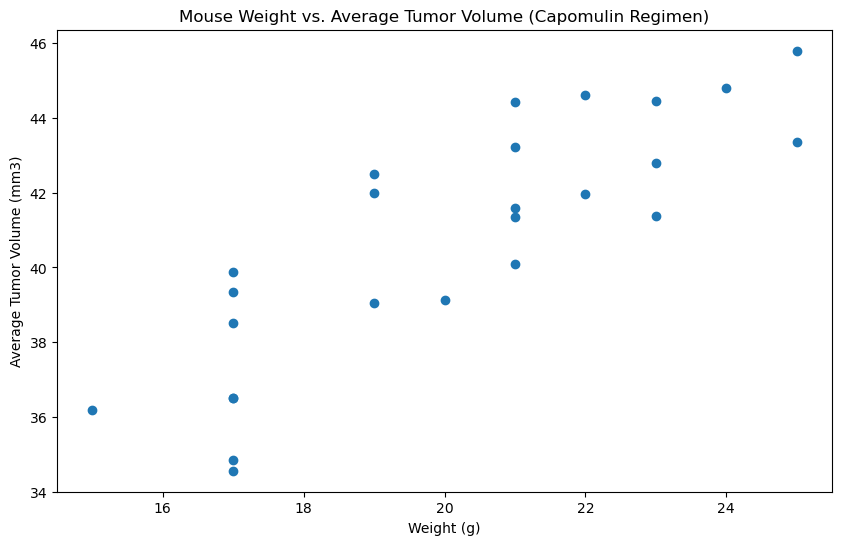

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = noduplicatemice_df[noduplicatemice_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
capomulin_mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


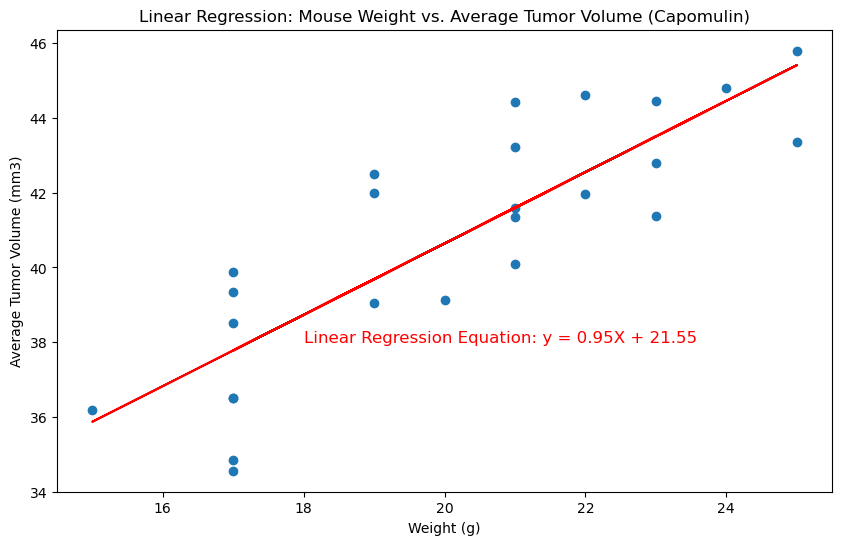

In [51]:
# Extract the data
mouse_weight = capomulin_mouse_weight
tumor_volume = capomulin_avg_tumor_volume

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {r_value:.2f}")

# Create a linear regression line
regression_line = slope * mouse_weight + intercept
regression_equation = f"{slope:.2f}X + {intercept:.2f}"

# Plot the data points and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, tumor_volume, label='Data Points')
plt.plot(mouse_weight, regression_line, color='red', label='Linear Regression Line')

# Add labels and a title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression: Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Display the linear regression equation and correlation coefficient (r-value)
plt.annotate(f'Linear Regression Equation: y = {regression_equation}', (18, 38),fontsize=12, color="red")
# Display the plot
plt.show()